# Computer Vision Histograms

### Import statements

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Histograms

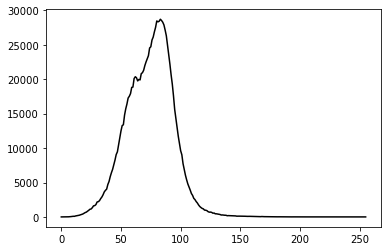

In [72]:
# Load some images, calculate and plot their color histograms, one color at the time
# try it with different color spaces BGR, HSV, etc
image = cv2.imread("img/blue-red-flowers.png")
# BGR is the default colour space, we'll start with grayscale
image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

grayscale_histogram = cv2.calcHist([image_grayscale], [0], None, [256], [0,256])
plt.plot(grayscale_histogram, color="k")
plt.show()
# A nice histogram showing that there is mostly gray with a value between ~50-90

# cv2.imshow("Gray image", image_grayscale)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

[Hint](# "cv2.calcHist") 


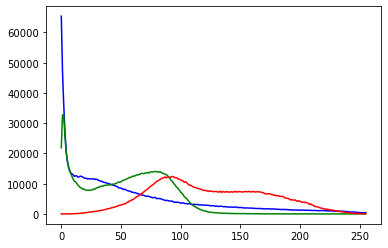

In [73]:
# Now try to plot all 3 channels at the same time, does the histogram give you an idea of what the image looks like?
flowers = cv2.imread("img/blue-red-flowers.png")

channels = [[0],[1],[2]]
colours = ["b", "g", "r"]
for channel, colour in zip(channels,colours):
    histogram = cv2.calcHist([flowers], channel, None, [256], [0,256])
    plt.plot(histogram, colour)

# The histograms for this image show that the Reds and Blues are pretty separate, but green is mixed with both
plt.show()
cv2.imshow("Flowers", flowers)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Mini project

### Level 1

#### Image classifier

1. By using only computer vision techniques (no Neural Networks and ML are not allowed) create a binary classifier that can detect if a picutre was taken during the day, you can use the images day/night in the img folder or feel free to add your own images.

In [74]:
!ls img

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [75]:
# First off, split the images into day or night
day_files = ["img/day1.jpg", "img/day2.jpg", "img/day3.jpg", "img/day4.jpg"]
night_files = ["img/night1.jpg", "img/night2.jpg", "img/night3.png", "img/night4.jpg"]
day_images = []
night_images = []
for day_file, night_file in zip(day_files, night_files):
    day_images.append(cv2.imread(day_file))
    night_images.append(cv2.imread(night_file))

print(len(day_images))
print(len(night_images))

4
4


In [76]:
channels = [[0],[1],[2]]
colours = ["b", "g", "r"]


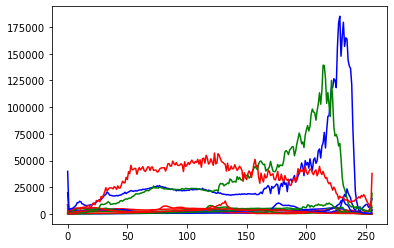

In [84]:
# Day histograms
day_histograms = []
for sample in day_images:
    for channel, colour in zip(channels,colours):
        histogram = cv2.calcHist([sample], channel, None, [256], [0,256])
        plt.plot(histogram, colour)
        day_histograms.append(histogram)
plt.show()

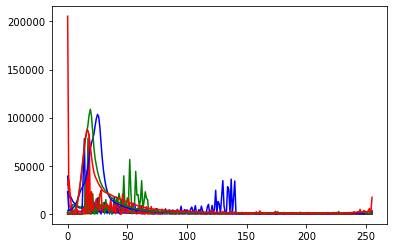

In [83]:
# Night Histograms
night_histograms = []
for sample in night_images:
    for channel, colour in zip(channels,colours):
        histogram = cv2.calcHist([sample], channel, None, [256], [0,256])
        plt.plot(histogram, colour)
        night_histograms.append(histogram)
plt.show()

Visually we can tell that there is a definite difference in the colour make-up of day and night pictures, these histograms show it with Night pictures having low blue scores take up far more of their data.
<br>
Let's see if we can define this in some way...

In [102]:
indexes = range(0, len(day_histograms), 3)
day_means = []
night_means = []
for number, index in enumerate(indexes):
    print(f"Day {number} mean: {day_histograms[index].mean()}")
    day_means.append(day_histograms[index].mean())
    # print(f"Day {number} max: {day_histograms[index].max()}")
    # print(f"Day {number} min: {day_histograms[index].min()}")

for number, index in enumerate(indexes):
    print(f"Night {number} mean: {night_histograms[index].mean()}")
    night_means.append(night_histograms[index].mean())
    # print(f"Night {number} max: {night_histograms[index].max()}")
    # print(f"Night {number} min: {night_histograms[index].min()}")

day_means = np.array(day_means)
print(f"Overall Day Mean: {day_means.mean()}")
night_means = np.array(night_means)
print(f"Overall Night Mean: {night_means.mean()}")

midpoint = (day_means.mean() + night_means.mean()) / 2
print(f"Midpoint of means: {midpoint}")

# So for this incredibly simplistic binary classifier, whatever the mean of an image's histogram
# is closer to, will be it's classification

Day 0 mean: 3316.4375
Day 1 mean: 2732.0
Day 2 mean: 2349.0234375
Day 3 mean: 32400.0
Night 0 mean: 1270.625
Night 1 mean: 1404.84375
Night 2 mean: 3384.375
Night 3 mean: 7500.0
Overall Day Mean: 10199.365234375
Overall Night Mean: 3389.9609375
Midpoint of means: 6794.6630859375


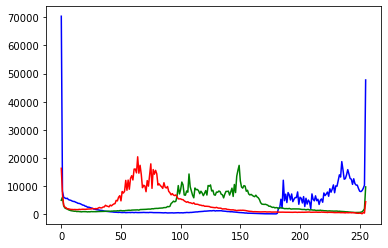

Mean: 3600.0
Night image


In [120]:
# Let's test it out!
test = cv2.imread("img/sunny.jpg")
channels = [[0],[1],[2]]
colours = ["b", "g", "r"]
test_histograms = []
for channel, colour in zip(channels,colours):
    histogram = cv2.calcHist([test], channel, None, [256], [0,256])
    plt.plot(histogram, colour)
plt.show()
print(f"Mean: {histogram.mean()}")
if histogram.mean() > midpoint:
    print("Day image")
else:
    print("Night image")

Now after reviewing the above I realised that the mean value was not what I thought it was (the average value of each colour throughout the image) and was instead the average *frequency* of the colour, meaning that bigger resolution images would have higher means, so all the above code actually does is determine if the test image's size is closer to the average size of the day or night images...
<br> Which is ***NOT*** what we wanted!
<p> Let's try this again...

In [131]:
day_means = []
night_means = []
# So to get the average colour value, histograms arent needed at all
for picture in day_images:
    day_means.append(picture.mean())
for picture in night_images:
    night_means.append(picture.mean())

# Convert to numpy arrays...
day_means = np.array(day_means)
night_means = np.array(night_means)
print(f"Overall Day Mean: {day_means.mean()}")
print(f"Overall Night Mean: {night_means.mean()}")
midpoint = ( day_means.mean() + night_means.mean()) / 2
print(f"Midpoint: {midpoint}")

Overall Day Mean: 139.71940930109596
Overall Night Mean: 54.53535513444146
Midpoint: 97.12738221776871


In [132]:
test = cv2.imread("img/sunny.jpg")
if test.mean() > midpoint:
    print("Day image")
else:
    print("Night image")

Day image


Great! This was much easier and does work for a nice sunny image.